<a href="https://colab.research.google.com/github/carolineb3/US-FlightDelayModeling/blob/main/Regression_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Load Regression Data
import pandas as pd

path = '/content/drive/MyDrive/MIS 545 Project/'

X_train_reg = pd.read_csv(path + 'X_train_reg.csv')
X_test_reg  = pd.read_csv(path + 'X_test_reg.csv')
y_train_reg = pd.read_csv(path + 'y_train_reg.csv')
y_test_reg  = pd.read_csv(path + 'y_test_reg.csv')

print("Shapes:")
print(X_train_reg.shape, y_train_reg.shape)
print(X_test_reg.shape, y_test_reg.shape)


Shapes:
(1447885, 18) (1447885, 1)
(361972, 18) (361972, 1)


In [ ]:
#Load Preprocessor (from Data_Cleaning_and_Feature_Engineering.ipynb)

import joblib

preprocessor = joblib.load('/content/drive/MyDrive/MIS 545 Project/preprocessor_final.joblib')

print("Preprocessor loaded successfully.")


Preprocessor loaded successfully.


In [ ]:
#Baseline Linear Regression Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

#Build pipeline: Preprocessor + LinearRegression model
linreg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

#Fit model
linreg_pipe.fit(X_train_reg, y_train_reg)

print("Baseline Linear Regression model trained successfully.")


Baseline Linear Regression model trained successfully.


In [ ]:
#Evaluate Baseline Linear Regression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = linreg_pipe.predict(X_test_reg)

# Calculate metrics
mae  = mean_absolute_error(y_test_reg, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
r2   = r2_score(y_test_reg, y_pred)

print("Baseline Linear Regression Performance:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R^2 :", r2)


Baseline Linear Regression Performance:
MAE : 28.334575864114584
RMSE: 61.250673519662556
R^2 : 0.03326785403233157


In [ ]:
#Ridge Regression with Cross-Validation

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#Build pipeline: preprocessor + Ridge model
ridge_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

#Parameter grid for Ridge
param_grid_ridge = {
    'model__alpha': [0.1, 1, 5, 10, 20, 50, 100]
}

#Grid Search with 3-fold CV (professor uses 3 in class)
ridge_grid = GridSearchCV(
    ridge_pipe,
    param_grid_ridge,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

#Fit CV model
ridge_grid.fit(X_train_reg, y_train_reg)

print("Best Ridge alpha:", ridge_grid.best_params_)


Best Ridge alpha: {'model__alpha': 1}


In [ ]:
#Evaluate Ridge Regression

# Get best model from GridSearch
ridge_best = ridge_grid.best_estimator_

# Predict
y_pred_ridge = ridge_best.predict(X_test_reg)

# Compute metrics
mae_ridge  = mean_absolute_error(y_test_reg, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge))
r2_ridge   = r2_score(y_test_reg, y_pred_ridge)

print("Ridge Regression Performance:")
print("MAE :", mae_ridge)
print("RMSE:", rmse_ridge)
print("R^2 :", r2_ridge)


Ridge Regression Performance:
MAE : 28.334620938217395
RMSE: 61.25068602565752
R^2 : 0.03326745926284114


In [ ]:
#LASSO Regression with Cross-Validation

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#Build pipeline
lasso_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(max_iter=5000))
])

#Parameter grid for LASSO
param_grid_lasso = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10]
}

lasso_grid = GridSearchCV(
    lasso_pipe,
    param_grid_lasso,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

#Fit model
lasso_grid.fit(X_train_reg, y_train_reg)

print("Best LASSO alpha:", lasso_grid.best_params_)


Best LASSO alpha: {'model__alpha': 0.001}


In [ ]:
#Evaluate LASSO Regression

# Get best estimator from the grid search
lasso_best = lasso_grid.best_estimator_

# Predict using LASSO
y_pred_lasso = lasso_best.predict(X_test_reg)

# Compute metrics
mae_lasso  = mean_absolute_error(y_test_reg, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test_reg, y_pred_lasso))
r2_lasso   = r2_score(y_test_reg, y_pred_lasso)

print("LASSO Regression Performance:")
print("MAE :", mae_lasso)
print("RMSE:", rmse_lasso)
print("R^2 :", r2_lasso)


LASSO Regression Performance:
MAE : 28.339383190451834
RMSE: 61.25245314500774
R^2 : 0.033211676820773084


In [ ]:
#Gradient Boosting Regressor with Cross-Validation

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#Build pipeline
gbr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())
])

# Hyperparameter grid (simple + MIS545 style)
param_grid_gbr = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [2, 3]
}

gbr_grid = GridSearchCV(
    gbr_pipe,
    param_grid_gbr,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit model
gbr_grid.fit(X_train_reg, y_train_reg)

print("Best Gradient Boosting parameters:", gbr_grid.best_params_)


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Best Gradient Boosting parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}


In [ ]:
# Evaluate Gradient Boosting Regressor

# Get the best model
gbr_best = gbr_grid.best_estimator_

# Predict on test set
y_pred_gbr = gbr_best.predict(X_test_reg)

# Compute metrics
mae_gbr  = mean_absolute_error(y_test_reg, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test_reg, y_pred_gbr))
r2_gbr   = r2_score(y_test_reg, y_pred_gbr)

print("Gradient Boosting Regression Performance:")
print("MAE :", mae_gbr)
print("RMSE:", rmse_gbr)
print("R^2 :", r2_gbr)


Gradient Boosting Regression Performance:
MAE : 27.943539490217308
RMSE: 60.94676848610951
R^2 : 0.042837247918434795


**Regression Visualizations**

In [ ]:
whos


Variable                    Type                 Data/Info
----------------------------------------------------------
GradientBoostingRegressor   ABCMeta              <class 'sklearn.ensemble.<...>adientBoostingRegressor'>
GridSearchCV                ABCMeta              <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
Lasso                       ABCMeta              <class 'sklearn.linear_mo<...>oordinate_descent.Lasso'>
LinearRegression            ABCMeta              <class 'sklearn.linear_mo<...>._base.LinearRegression'>
Pipeline                    ABCMeta              <class 'sklearn.pipeline.Pipeline'>
Ridge                       ABCMeta              <class 'sklearn.linear_model._ridge.Ridge'>
X_test_reg                  DataFrame                    YEAR  MONTH  DAY_<...>361972 rows x 18 columns]
X_train_reg                 DataFrame                     YEAR  MONTH  DAY<...>447885 rows x 18 columns]
colors                      list                 n=4
drive                

In [ ]:
import joblib

joblib.dump(y_pred_gbr, path + "y_pred_gbr.pkl")
joblib.dump(y_pred_ridge, path + "y_pred_ridge.pkl")
joblib.dump(y_pred_lasso, path + "y_pred_lasso.pkl")
joblib.dump(y_pred, path + "y_pred_linear.pkl")


['/content/drive/MyDrive/MIS 545 Project/y_pred_linear.pkl']

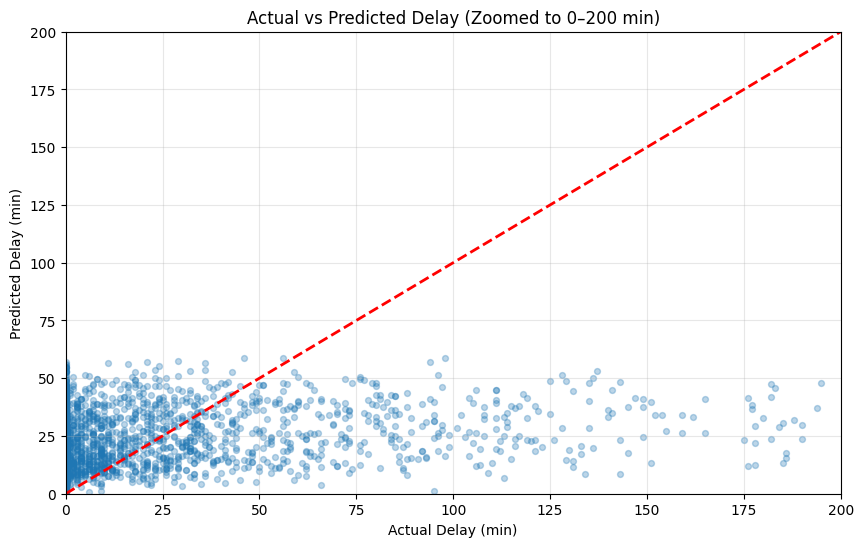

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample for clarity
idx = np.random.choice(len(y_test_reg), 3000, replace=False)
actual = y_test_reg.iloc[idx]
pred = gbr_best.predict(X_test_reg.iloc[idx])

plt.figure(figsize=(10,6))
plt.scatter(actual, pred, alpha=0.3, s=18)
plt.plot([0,200],[0,200], color='red', linestyle='--', linewidth=2)

plt.xlim(0,200)
plt.ylim(0,200)

plt.title("Actual vs Predicted Delay (Zoomed to 0–200 min)")
plt.xlabel("Actual Delay (min)")
plt.ylabel("Predicted Delay (min)")

plt.grid(alpha=0.3)
plt.show()



In [ ]:
%whos




Variable   Type      Data/Info
------------------------------
np         module    <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns        module    <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
